<a href="https://colab.research.google.com/github/olalepek/Text-Mining---Agriculture/blob/main/Agriculture_Tweet_Text_Mining_and_Sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOW TO CULTIVATE YOUR FIELD

This project conducts a comprehensive **analysis of the impact of tillage practices on Soil Organic Carbon (SOC)** through the review of abstracts from scientific publications. **Using various text mining and sentiment analysis techniques**, the project explores the findings of published research to quantify the effects of minimum tillage compared to conventional tillage practices. From preprocessing to modeling, each step is designed to extract  insights into how tillage practices influence SOC, setting the stage for broader investigations into agricultural practices' environmental impacts.

## Preparation


> **Setup**: This section prepares the environment by importing necessary libraries and setting up prerequisites for the analysis.

> **Preprocessing**: Focuses on cleaning and preparing the data for analysis, including text normalization and tokenization.

>**Lemmatized Text & Porter Stemmer**: Demonstrates the process of lemmatizing the text to its base form to ensure consistency in analysis. Then comparing Lemmatized Abstract with Porter Stemmer Compares the effectiveness of lemmatization versus stemming.


## Models

>**Topic Modelling from Abstracts**: Applies topic modeling techniques to classify abstracts into different themes related to agriculture in general.
Then assigning dominant topic to each article to be able to classify them.

> **TF-IDF (Term Frequency-Inverse Document Frequency)**: Utilizes TF-IDF to highlight the importance of specific words and phrases in the corpus.

> **Apriori Model to Count the Words & Word Cloud**: Employs the Apriori model for word frequency analysis and visualizes the results through a word cloud

## Rule Based Matching

> **Pattern/Entity recognition** Updating the ents dictionary with the mapping provided to iclude words and phrases connected to the agriculture and the project topic. Then identifing words and phrases that indicate effect of the practice (increse or decrease) on soil componen based on the dictionary provided.

> **Finiding matches based on entity recognition**: Based on earlier identified entities creating matcher that will select the articles that INCREASED SOC and are connected to MINIMSL/NO TILLAGE practices

## Results
From **17875 only 244 (1%)** articles were identified as connected to Minimal/No Tillage practices impact on increasing Soil Organic Carbon. However this result needs to be further verified as there are potential matches missing or also mismatches in this set.










# Setup

In [1]:
!pip install rispy pandas

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rispy
!python -m spacy download en_core_web_sm
import spacy
import re
from spacy.matcher import Matcher
from spacy.pipeline import EntityRuler
from spacy.matcher import DependencyMatcher
!pip show spacy



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 14.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Name: spacy
Version: 3.7.4
Summary: Industrial-strength Natural Language Processing (NLP) in Python
Home-page: https://spacy.io
Author: Explosion
Author-email: contact@explosion.ai
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: catalogue, cymem, jinja2, langcodes, murmurhash, numpy, packaging, preshed, pydantic, requests, setuptools, smart-open, spacy-legacy, spacy-loggers, srsly, thinc, tqdm, typer, wasabi, weasel
Required-by: en-core-web-sm, fastai


# Preprocessing




In this section the data was explored to verify the content of the files.

Then Porter Stemmer and Lemmatization was used to obtain the roots of the words. In pboth cases additional processing was done to normalize the text and clean up the remaining parts of the speach (replacing punctuation , removing stopwords).

In [3]:

ris_file_path ='/content/drive/MyDrive/Studia DSE/combined_file.ris'

with open(ris_file_path, 'r') as bibliography_file:
    entries = rispy.load(bibliography_file)


df = pd.DataFrame(entries)

In [5]:
df.iloc[1]

type_of_reference                                                 JOUR
title                Differences in Herbicide Adsorption on Soil Us...
custom3                                                            NaN
alternate_title1     J. Environ. Sci. Health Part B Pestic. Food Co...
volume                                                              23
number                                                               6
start_page                                                         559
end_page                                                           573
year                                                              1988
issn                                                   03601234 (ISSN)
authors              [Clay, S.A., Koskinen, W.C., Allmaras, R.R., D...
author_address       Agricultural Research Service USDA, 1991 Upper...
abstract             Effects of soil pH on weak acid and weak base ...
keywords             [atrazine, dicamba, atrazine, dicamba, adsorpt...
publis

In [6]:
selected = ['title','alternate_title1','year','authors','abstract','keywords','secondary_title','notes','type_of_work']
dataset = df[selected]

In [7]:
dataset.head()

,title,alternate_title1,year,authors,abstract,keywords,secondary_title,notes,type_of_work
0,Valorga solid waste reduction process from France,AIChE Symp Ser,1988,"[Beetschen, Lee J., Cazanave, Philippe]",Valorga has developed an innovative process fo...,"[Biogas--Production, Fuels--Refuse Derived Fue...",NaN,"[Export Date: 30 April 2020, CODEN: ACSSC, Cor...",Conference Paper
1,Differences in Herbicide Adsorption on Soil Us...,J. Environ. Sci. Health Part B Pestic. Food Co...,1988,"[Clay, S.A., Koskinen, W.C., Allmaras, R.R., D...",Effects of soil pH on weak acid and weak base ...,"[atrazine, dicamba, atrazine, dicamba, adsorpt...","Journal of Environmental Science and Health, P...","[Cited By :19, Export Date: 30 April 2020]",Article
2,Agroforestry on alkali soil: effect of plantin...,Agroforest Syst,1988,"[Singh, G., Abrol, I.P., Cheema, S.S.]",Growth responses of mesquite (Prosopis juliflo...,"[Agroforestry, alkali soil, amendments, biomas...",Agroforestry Systems,"[Cited By :18, Export Date: 30 April 2020, COD...",Article
3,Fertilizer requirement of rice-wheat and maize...,Fertilizer Research,1988,"[Maskina, M.S., Bijay-Singh, Yadvinder-Singh, ...",Field experiments with rice-wheat rotation wer...,"[farmyard manure, maize, nitrogen, phosphorus,...",Fertilizer Research,"[Cited By :24, Export Date: 30 April 2020, COD...",Article
4,Effects of different levels of chemical Nitrog...,Fertilizer Research,1988,"[Singh, A.L., Singh, P.K., Lata, P.]",Application of higher levels (60 and 90 kg N h...,"[Azolla pinnata (Bangkok), blue-green algae (B...",Fertilizer Research,"[Cited By :4, Export Date: 30 April 2020, CODE...",Article


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17875 entries, 0 to 17874
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             17875 non-null  object
 1   alternate_title1  17715 non-null  object
 2   year              17875 non-null  object
 3   authors           17869 non-null  object
 4   abstract          17842 non-null  object
 5   keywords          17197 non-null  object
 6   secondary_title   17481 non-null  object
 7   notes             17875 non-null  object
 8   type_of_work      17874 non-null  object
dtypes: object(9)
memory usage: 1.2+ MB


In [9]:
dataset = dataset.dropna(axis=0, how="any")

In [10]:
dataset = dataset.astype(str)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16678 entries, 1 to 17874
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             16678 non-null  object
 1   alternate_title1  16678 non-null  object
 2   year              16678 non-null  object
 3   authors           16678 non-null  object
 4   abstract          16678 non-null  object
 5   keywords          16678 non-null  object
 6   secondary_title   16678 non-null  object
 7   notes             16678 non-null  object
 8   type_of_work      16678 non-null  object
dtypes: object(9)
memory usage: 1.3+ MB


### Porter Stemmer

In [13]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

processed=[]


for abstract in dataset['abstract']:

    abstract = re.sub('[^a-zA-Z]', ' ', abstract) #replacing any punctuation or anything that is not ^ a-z and A-Zletter with the space

    abstract = abstract.lower() #lowercase all the words
    abstract = abstract.split()# splitting the abstract into words

      # Stemming the words to keep only the roots using Porter Stemmer
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    abstract = [ps.stem(word) for word in abstract if not word in set(all_stopwords)]
    abstract = ' '.join(abstract)
    processed.append(abstract)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
dataset['processed'] = processed

In [15]:
dataset.head()

,title,alternate_title1,year,authors,abstract,keywords,secondary_title,notes,type_of_work,processed
1,Differences in Herbicide Adsorption on Soil Us...,J. Environ. Sci. Health Part B Pestic. Food Co...,1988,"['Clay, S.A.', 'Koskinen, W.C.', 'Allmaras, R....",Effects of soil pH on weak acid and weak base ...,"['atrazine', 'dicamba', 'atrazine', 'dicamba',...","Journal of Environmental Science and Health, P...","['Cited By :19', 'Export Date: 30 April 2020']",Article,effect soil ph weak acid weak base herbicid ad...
2,Agroforestry on alkali soil: effect of plantin...,Agroforest Syst,1988,"['Singh, G.', 'Abrol, I.P.', 'Cheema, S.S.']",Growth responses of mesquite (Prosopis juliflo...,"['Agroforestry', 'alkali soil', 'amendments', ...",Agroforestry Systems,"['Cited By :18', 'Export Date: 30 April 2020',...",Article,growth respons mesquit prosopi juliflora sw dc...
3,Fertilizer requirement of rice-wheat and maize...,Fertilizer Research,1988,"['Maskina, M.S.', 'Bijay-Singh', 'Yadvinder-Si...",Field experiments with rice-wheat rotation wer...,"['farmyard manure', 'maize', 'nitrogen', 'phos...",Fertilizer Research,"['Cited By :24', 'Export Date: 30 April 2020',...",Article,field experi rice wheat rotat conduct five con...
4,Effects of different levels of chemical Nitrog...,Fertilizer Research,1988,"['Singh, A.L.', 'Singh, P.K.', 'Lata, P.']",Application of higher levels (60 and 90 kg N h...,"['Azolla pinnata (Bangkok)', 'blue-green algae...",Fertilizer Research,"['Cited By :4', 'Export Date: 30 April 2020', ...",Article,applic higher level kg n ha nitrogen fertil ur...
5,Correlation of several soil N indices for wheat,Commun. Soil Sci. Plant Anal.,1988,"['Gelderman, R.H.', 'Dahnke, W.C.', 'Swenson, ...",A study relating N uptake by wheat to several ...,"['mineralizable nitrogen', 'mineralization', '...",Communications in Soil Science and Plant Analysis,"['Cited By :11', 'Export Date: 30 April 2020']",Article,studi relat n uptak wheat sever n soil test co...


## Lemmatized text

In [16]:
!pip install spacy

In [17]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [18]:
def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

In [19]:
dataset['lemmatized_text'] = dataset['abstract'].apply(lemmatize_text)


In [26]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

processed2=[]


for abstract in dataset['lemmatized_text']:
  abstract = re.sub('[^a-zA-Z]', ' ', abstract) #replacing any punctuation or anything that is not ^ a-z and A-Zletter with the space
  abstract = abstract.lower() #lowercase all the words
  all_stopwords = stopwords.words('english')
  words = word_tokenize(abstract)
  filtered_abstract = " ".join(word for word in words if word not in all_stopwords)
  processed2.append(filtered_abstract)
dataset['processed_lemmatized'] = processed2

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:
dataset.rename(columns={'porter_stemmer': 'processed_porter_stemmer'}, inplace=True)

### Comparing Lemmatized abstract with Porter Stemmer


In [36]:
selected = ['abstract','processed_porter_stemmer','processed_lemmatized' ]
dataset_view = dataset[selected]

dataset_view.head()

,abstract,processed_porter_stemmer,processed_lemmatized
1,Effects of soil pH on weak acid and weak base ...,effect soil ph weak acid weak base herbicid ad...,effect soil ph weak acid weak base herbicide a...
2,Growth responses of mesquite (Prosopis juliflo...,growth respons mesquit prosopi juliflora sw dc...,growth response mesquite prosopis juliflora sw...
3,Field experiments with rice-wheat rotation wer...,field experi rice wheat rotat conduct five con...,field experiment rice wheat rotation conduct f...
4,Application of higher levels (60 and 90 kg N h...,applic higher level kg n ha nitrogen fertil ur...,application high level kg n ha nitrogen fertil...
5,A study relating N uptake by wheat to several ...,studi relat n uptak wheat sever n soil test co...,study relate n uptake wheat several n soil tes...


**Findings**

The Porter Stemmer reduces the word to its root, however this root is not always a good representation of the meaning. For the purpose of the further analysis the lemmitized and processed text will be used.




In [37]:
dataset.to_csv('/content/drive/MyDrive/Studia DSE/abstracts_stemmed_lemmatized.csv', index=False)

#Models


## Topic Modelling from abstracts

In [39]:
from gensim import corpora
from gensim.models import LdaModel

In [40]:
def tokenize_text(text):
    return nltk.word_tokenize(text)

In [41]:
dataset['abstract_tokens_lemmatized'] = dataset['processed_lemmatized'].apply(tokenize_text)

In [42]:
dataset.to_csv('/content/drive/MyDrive/Studia DSE/abstracts_stemmed_lemmatized_tokens.csv', index=False)

In [43]:
dictionary = corpora.Dictionary(dataset['abstract_tokens_lemmatized'])

In [47]:
corpus = [dictionary.doc2bow(text) for text in dataset['abstract_tokens_lemmatized']]

lda_model = LdaModel(corpus, num_topics=20, id2word=dictionary, passes=15)


In [48]:
topics = lda_model.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.044*"soil" + 0.032*"biochar" + 0.015*"sorption" + 0.012*"organic" + 0.011*"concentration" + 0.011*"doc" + 0.010*"water" + 0.009*"carbon"')
(1, '0.063*"soil" + 0.062*"tillage" + 0.027*"nt" + 0.023*"aggregate" + 0.023*"cm" + 0.020*"ct" + 0.015*"depth" + 0.014*"system"')
(2, '0.203*"n" + 0.022*"kg" + 0.021*"nitrogen" + 0.020*"soil" + 0.019*"ha" + 0.017*"rate" + 0.016*"fertilizer" + 0.012*"application"')
(3, '0.043*"ha" + 0.027*"yield" + 0.025*"soil" + 0.024*"biochar" + 0.023*"application" + 0.021*"kg" + 0.018*"manure" + 0.016*"organic"')
(4, '0.049*"soil" + 0.036*"community" + 0.030*"microbial" + 0.017*"bacterial" + 0.014*"diversity" + 0.013*"abundance" + 0.013*"structure" + 0.012*"composition"')
(5, '0.055*"soil" + 0.020*"use" + 0.019*"model" + 0.011*"field" + 0.010*"datum" + 0.009*"study" + 0.009*"value" + 0.009*"analysis"')
(6, '0.231*"p" + 0.036*"k" + 0.033*"soil" + 0.032*"lt" + 0.026*"mg" + 0.026*"r" + 0.022*"kg" + 0.020*"gt"')
(7, '0.092*"soil" + 0.030*"ph" + 0.018*"clay" + 0

### Abstracts classification

In [49]:
topic_distributions = lda_model[corpus]
dominant_topics = [sorted(doc, key=lambda x: x[1], reverse=True)[0][0] for doc in topic_distributions]
dataset['dominant_topic'] = dominant_topics

In [52]:
dataset.head()

,title,alternate_title1,year,authors,abstract,keywords,secondary_title,notes,type_of_work,processed_porter_stemmer,lemmatized_text,processed_lemmatized,abstract_tokens_lemmatized,dominant_topic
1,Differences in Herbicide Adsorption on Soil Us...,J. Environ. Sci. Health Part B Pestic. Food Co...,1988,"['Clay, S.A.', 'Koskinen, W.C.', 'Allmaras, R....",Effects of soil pH on weak acid and weak base ...,"['atrazine', 'dicamba', 'atrazine', 'dicamba',...","Journal of Environmental Science and Health, P...","['Cited By :19', 'Export Date: 30 April 2020']",Article,effect soil ph weak acid weak base herbicid ad...,effect of soil ph on weak acid and weak base h...,effect soil ph weak acid weak base herbicide a...,"[effect, soil, ph, weak, acid, weak, base, her...",7
2,Agroforestry on alkali soil: effect of plantin...,Agroforest Syst,1988,"['Singh, G.', 'Abrol, I.P.', 'Cheema, S.S.']",Growth responses of mesquite (Prosopis juliflo...,"['Agroforestry', 'alkali soil', 'amendments', ...",Agroforestry Systems,"['Cited By :18', 'Export Date: 30 April 2020',...",Article,growth respons mesquit prosopi juliflora sw dc...,growth response of mesquite ( Prosopis juliflo...,growth response mesquite prosopis juliflora sw...,"[growth, response, mesquite, prosopis, juliflo...",12
3,Fertilizer requirement of rice-wheat and maize...,Fertilizer Research,1988,"['Maskina, M.S.', 'Bijay-Singh', 'Yadvinder-Si...",Field experiments with rice-wheat rotation wer...,"['farmyard manure', 'maize', 'nitrogen', 'phos...",Fertilizer Research,"['Cited By :24', 'Export Date: 30 April 2020',...",Article,field experi rice wheat rotat conduct five con...,field experiment with rice - wheat rotation be...,field experiment rice wheat rotation conduct f...,"[field, experiment, rice, wheat, rotation, con...",3
4,Effects of different levels of chemical Nitrog...,Fertilizer Research,1988,"['Singh, A.L.', 'Singh, P.K.', 'Lata, P.']",Application of higher levels (60 and 90 kg N h...,"['Azolla pinnata (Bangkok)', 'blue-green algae...",Fertilizer Research,"['Cited By :4', 'Export Date: 30 April 2020', ...",Article,applic higher level kg n ha nitrogen fertil ur...,application of high level ( 60 and 90 kg N ha-...,application high level kg n ha nitrogen fertil...,"[application, high, level, kg, n, ha, nitrogen...",3
5,Correlation of several soil N indices for wheat,Commun. Soil Sci. Plant Anal.,1988,"['Gelderman, R.H.', 'Dahnke, W.C.', 'Swenson, ...",A study relating N uptake by wheat to several ...,"['mineralizable nitrogen', 'mineralization', '...",Communications in Soil Science and Plant Analysis,"['Cited By :11', 'Export Date: 30 April 2020']",Article,studi relat n uptak wheat sever n soil test co...,a study relate N uptake by wheat to several n ...,study relate n uptake wheat several n soil tes...,"[study, relate, n, uptake, wheat, several, n, ...",2


In [53]:
dataset.to_csv('/content/drive/MyDrive/Studia DSE/abstracts_lemmatized_topic_classified.csv', index=False)

<ipython-input-78-0afbf0d20fbd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=number_counts.index, y=number_counts.values, palette='coolwarm')


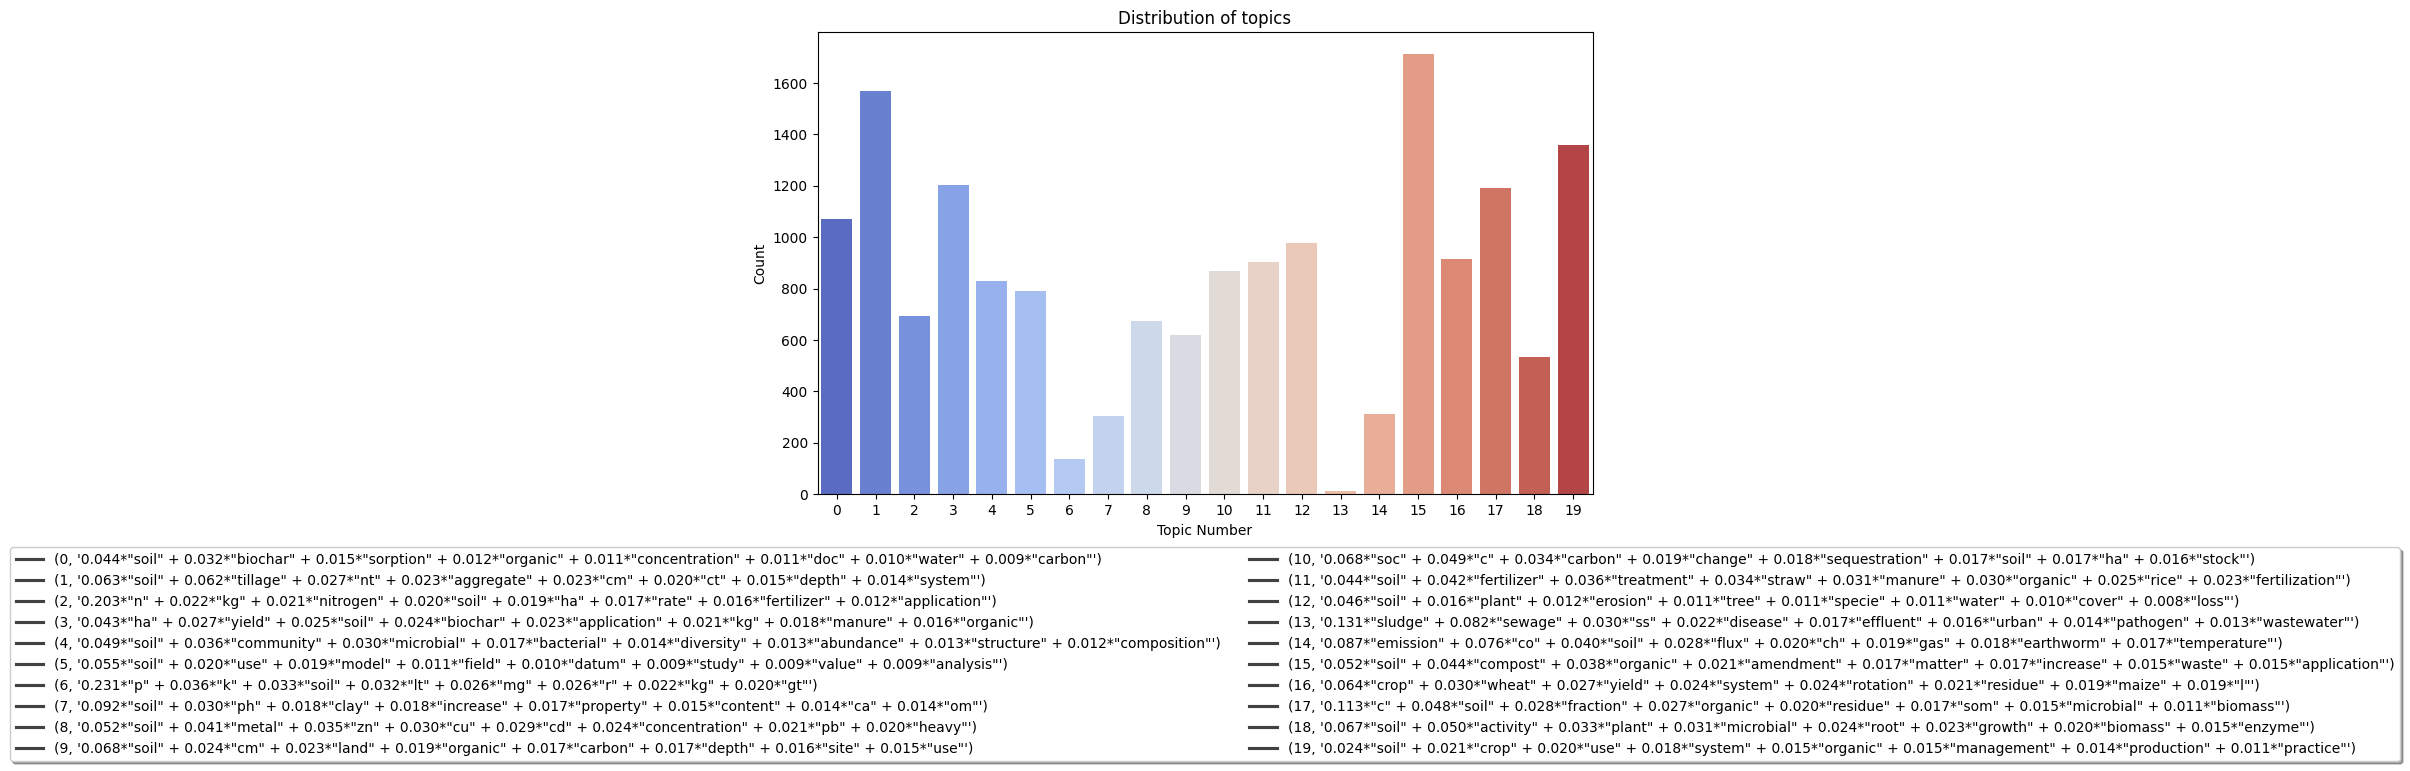

In [78]:
number_counts = dataset['dominant_topic'].value_counts().sort_index()
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=number_counts.index, y=number_counts.values, palette='coolwarm')
plt.xlabel('Topic Number')
plt.ylabel('Count')
plt.title('Distribution of topics')
plt.xticks(range(20), range(0, 20))
plt.legend(topics, loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)
plt.show()

## TF-IDF Term Frequency-Inverse Document Frequency

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF Vectorizer instance
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = vectorizer.fit_transform(dataset['processed_lemmatized'])

# Get feature names
feature_names = vectorizer.get_feature_names_out()

In [79]:
def get_top_tfidf_features(row, features, top_n=10):
    """Return top n tfidf values in row and their corresponding feature names."""
    topn_ids = row.argsort()[-top_n:][::-1]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    return top_feats

# Get the top features for the first abstract, for example
first_abstract_vector = tfidf_matrix[0].toarray()[0]
top_features_for_first_abstract = get_top_tfidf_features(first_abstract_vector, feature_names)
print(top_features_for_first_abstract)

[('adsorption', 0.4718234706633043), ('ph', 0.38767242770436766), ('solution', 0.28125338430014074), ('soil', 0.25270643399436615), ('atrazine', 0.22135484519284543), ('ionic', 0.21991990161497918), ('naoh', 0.2139205269470984), ('strength', 0.1828250912147036), ('herbicide', 0.16184052551794845), ('kd', 0.1439629727183271)]


## Creating Apriori Model to count the words and creating the word cloud

In [80]:
!pip install efficient_apriori

In [81]:
apriori =  dataset['processed_lemmatized']
transactions = apriori.str.split()
transactions = [tuple(row) for row in transactions.values.tolist()]
from efficient_apriori import apriori
itemsets, rules = apriori(transactions, min_support=0.25, min_confidence=1)
print(itemsets)

{1: {('effect',): 9270, ('soil',): 16549, ('change',): 4950, ('system',): 5418, ('may',): 4498, ('field',): 5436, ('different',): 5898, ('compare',): 6399, ('increase',): 11272, ('organic',): 15109, ('carbon',): 9262, ('decrease',): 5041, ('treatment',): 6774, ('reduce',): 4540, ('study',): 9998, ('p',): 4574, ('experiment',): 5769, ('plant',): 5032, ('total',): 5962, ('year',): 6336, ('significantly',): 5542, ('however',): 5174, ('use',): 9474, ('manure',): 4479, ('control',): 4692, ('two',): 5130, ('ha',): 4564, ('yield',): 4525, ('crop',): 7144, ('improve',): 4299, ('n',): 6852, ('content',): 7299, ('water',): 4597, ('rate',): 5169, ('low',): 6278, ('matter',): 9179, ('fertilizer',): 4578, ('application',): 6064, ('high',): 9668, ('nitrogen',): 4508, ('show',): 6389, ('significant',): 4367, ('result',): 9093, ('long',): 4392, ('term',): 4966, ('c',): 7145, ('three',): 4173, ('property',): 4342, ('management',): 5142, ('also',): 5058, ('indicate',): 4195}, 2: {('also', 'organic'): 46

In [83]:
print(itemsets)

{1: {('effect',): 9270, ('soil',): 16549, ('change',): 4950, ('system',): 5418, ('may',): 4498, ('field',): 5436, ('different',): 5898, ('compare',): 6399, ('increase',): 11272, ('organic',): 15109, ('carbon',): 9262, ('decrease',): 5041, ('treatment',): 6774, ('reduce',): 4540, ('study',): 9998, ('p',): 4574, ('experiment',): 5769, ('plant',): 5032, ('total',): 5962, ('year',): 6336, ('significantly',): 5542, ('however',): 5174, ('use',): 9474, ('manure',): 4479, ('control',): 4692, ('two',): 5130, ('ha',): 4564, ('yield',): 4525, ('crop',): 7144, ('improve',): 4299, ('n',): 6852, ('content',): 7299, ('water',): 4597, ('rate',): 5169, ('low',): 6278, ('matter',): 9179, ('fertilizer',): 4578, ('application',): 6064, ('high',): 9668, ('nitrogen',): 4508, ('show',): 6389, ('significant',): 4367, ('result',): 9093, ('long',): 4392, ('term',): 4966, ('c',): 7145, ('three',): 4173, ('property',): 4342, ('management',): 5142, ('also',): 5058, ('indicate',): 4195}, 2: {('also', 'organic'): 46

In [82]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
frequency_dict = {}

for k, v in itemsets.items():
    for items, frequency in v.items():
        key = ' '.join(items)
        frequency_dict[key] = frequency

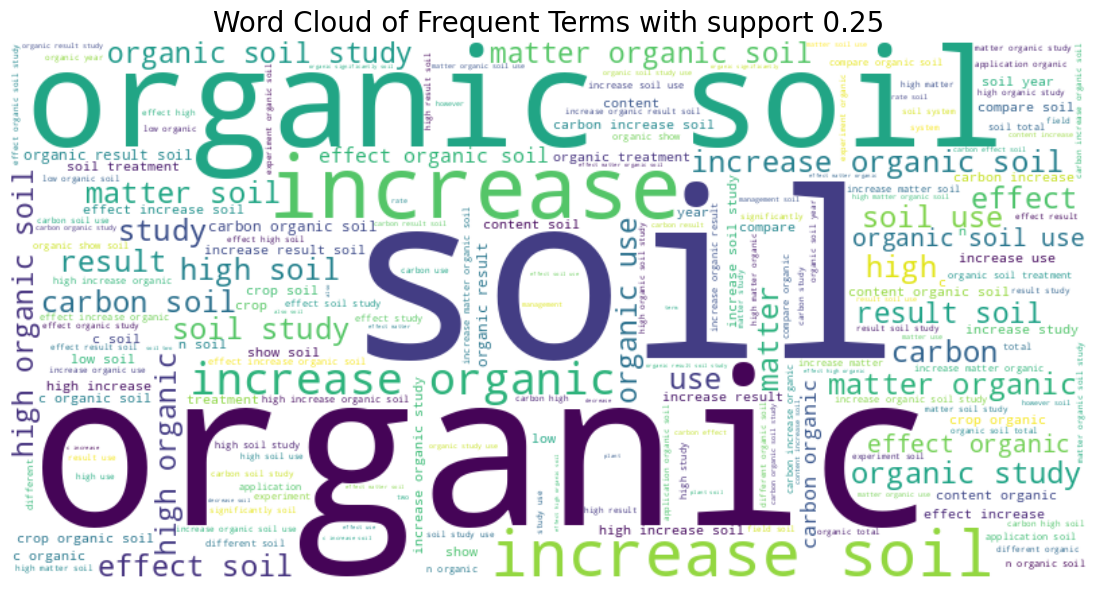

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(frequency_dict)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Frequent Terms with support 0.25', fontsize=20, color='black')
plt.show()






In [ ]:
itemsets2, rules2 = apriori(transactions, min_support=0.5, min_confidence=1)
print(itemsets2)

{1: {('effect',): 9270, ('soil',): 16549, ('increase',): 11272, ('organic',): 15109, ('carbon',): 9262, ('study',): 9998, ('use',): 9474, ('matter',): 9179, ('high',): 9668, ('result',): 9093}, 2: {('carbon', 'soil'): 9206, ('effect', 'organic'): 8425, ('effect', 'soil'): 9222, ('high', 'organic'): 8812, ('high', 'soil'): 9596, ('increase', 'organic'): 10246, ('increase', 'soil'): 11209, ('matter', 'organic'): 9127, ('matter', 'soil'): 9138, ('organic', 'soil'): 15037, ('organic', 'study'): 9118, ('organic', 'use'): 8534, ('result', 'soil'): 9029, ('soil', 'study'): 9927, ('soil', 'use'): 9395}, 3: {('effect', 'organic', 'soil'): 8397, ('high', 'organic', 'soil'): 8776, ('increase', 'organic', 'soil'): 10211, ('matter', 'organic', 'soil'): 9090, ('organic', 'soil', 'study'): 9075, ('organic', 'soil', 'use'): 8490}}


In [ ]:
frequency_dict2 = {}

for k, v in itemsets2.items():
    for items, frequency in v.items():
        key = ' '.join(items)
        frequency_dict2[key] = frequency

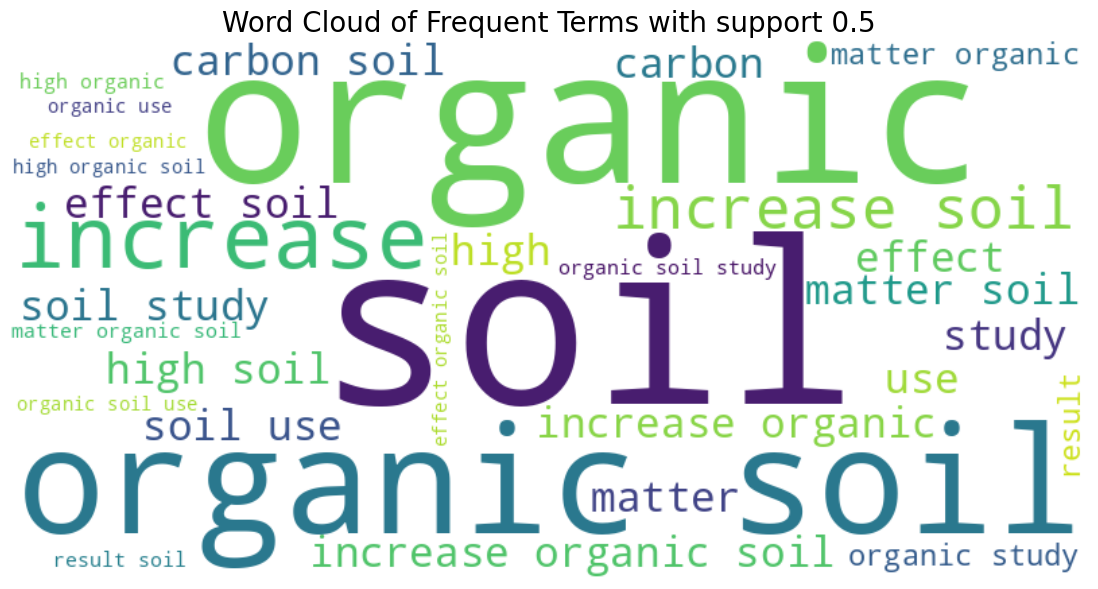

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(frequency_dict2)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Frequent Terms with support 0.5', fontsize=20, color='black')
plt.show()

## TextRank


In [ ]:
import networkx as nx
from collections import defaultdict

def textrank(text, window_size=2):
    words = text.split()
    graph = defaultdict(set)
    for i in range(len(words) - window_size):
        for j in range(i+1, i + window_size):
            graph[words[i]].add(words[j])
            graph[words[j]].add(words[i])

    nx_graph = nx.from_dict_of_lists(graph)
    scores = nx.pagerank(nx_graph)
    sorted_scores = sorted(scores, key=scores.get, reverse=True)
    return sorted_scores[:5]


In [ ]:
dataset['keywords'] = dataset['processed_lemmatized'].apply(textrank)

dataset.head()

,title,alternate_title1,year,authors,abstract,keywords,secondary_title,notes,type_of_work,processed,lemmatized_text,processed_lemmatized,abstract_tokens_lemmatized
1,Differences in Herbicide Adsorption on Soil Us...,J. Environ. Sci. Health Part B Pestic. Food Co...,1988,"[Clay, S.A., Koskinen, W.C., Allmaras, R.R., D...",Effects of soil pH on weak acid and weak base ...,"[soil, ph, adsorption, compare, solution]","Journal of Environmental Science and Health, P...","[Cited By :19, Export Date: 30 April 2020]",Article,effect soil ph weak acid weak base herbicid ad...,effect of soil ph on weak acid and weak base h...,effect soil ph weak acid weak base herbicide a...,"[effect, soil, ph, weak, acid, weak, base, her..."
2,Agroforestry on alkali soil: effect of plantin...,Agroforest Syst,1988,"[Singh, G., Abrol, I.P., Cheema, S.S.]",Growth responses of mesquite (Prosopis juliflo...,"[plant, grass, soil, mesquite, gypsum]",Agroforestry Systems,"[Cited By :18, Export Date: 30 April 2020, COD...",Article,growth respons mesquit prosopi juliflora sw dc...,growth response of mesquite ( Prosopis juliflo...,growth response mesquite prosopis juliflora sw...,"[growth, response, mesquite, prosopis, juliflo..."
3,Fertilizer requirement of rice-wheat and maize...,Fertilizer Research,1988,"[Maskina, M.S., Bijay-Singh, Yadvinder-Singh, ...",Field experiments with rice-wheat rotation wer...,"[soil, rice, ha, kg, yield]",Fertilizer Research,"[Cited By :24, Export Date: 30 April 2020, COD...",Article,field experi rice wheat rotat conduct five con...,field experiment with rice - wheat rotation be...,field experiment rice wheat rotation conduct f...,"[field, experiment, rice, wheat, rotation, con..."
4,Effects of different levels of chemical Nitrog...,Fertilizer Research,1988,"[Singh, A.L., Singh, P.K., Lata, P.]",Application of higher levels (60 and 90 kg N h...,"[bga, rice, azolla, kg, ha]",Fertilizer Research,"[Cited By :4, Export Date: 30 April 2020, CODE...",Article,applic higher level kg n ha nitrogen fertil ur...,application of high level ( 60 and 90 kg N ha-...,application high level kg n ha nitrogen fertil...,"[application, high, level, kg, n, ha, nitrogen..."
5,Correlation of several soil N indices for wheat,Commun. Soil Sci. Plant Anal.,1988,"[Gelderman, R.H., Dahnke, W.C., Swenson, L.]",A study relating N uptake by wheat to several ...,"[n, r, soil, year, use]",Communications in Soil Science and Plant Analysis,"[Cited By :11, Export Date: 30 April 2020]",Article,studi relat n uptak wheat sever n soil test co...,a study relate N uptake by wheat to several n ...,study relate n uptake wheat several n soil tes...,"[study, relate, n, uptake, wheat, several, n, ..."


In [ ]:
dataset.to_csv('/content/drive/MyDrive/Studia DSE/abstracts_textRank.csv', index=False)

# Rule Based Matching


### Entity Ruler based on the dictionary provided


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Studia DSE/abstracts_lemmatized_topic_classified.csv')


In [6]:
dataset.head()

,title,alternate_title1,year,authors,abstract,keywords,secondary_title,notes,type_of_work,processed_porter_stemmer,lemmatized_text,processed_lemmatized,abstract_tokens_lemmatized,dominant_topic
0,Differences in Herbicide Adsorption on Soil Us...,J. Environ. Sci. Health Part B Pestic. Food Co...,1988,"['Clay, S.A.', 'Koskinen, W.C.', 'Allmaras, R....",Effects of soil pH on weak acid and weak base ...,"['atrazine', 'dicamba', 'atrazine', 'dicamba',...","Journal of Environmental Science and Health, P...","['Cited By :19', 'Export Date: 30 April 2020']",Article,effect soil ph weak acid weak base herbicid ad...,effect of soil ph on weak acid and weak base h...,effect soil ph weak acid weak base herbicide a...,"['effect', 'soil', 'ph', 'weak', 'acid', 'weak...",7
1,Agroforestry on alkali soil: effect of plantin...,Agroforest Syst,1988,"['Singh, G.', 'Abrol, I.P.', 'Cheema, S.S.']",Growth responses of mesquite (Prosopis juliflo...,"['Agroforestry', 'alkali soil', 'amendments', ...",Agroforestry Systems,"['Cited By :18', 'Export Date: 30 April 2020',...",Article,growth respons mesquit prosopi juliflora sw dc...,growth response of mesquite ( Prosopis juliflo...,growth response mesquite prosopis juliflora sw...,"['growth', 'response', 'mesquite', 'prosopis',...",12
2,Fertilizer requirement of rice-wheat and maize...,Fertilizer Research,1988,"['Maskina, M.S.', 'Bijay-Singh', 'Yadvinder-Si...",Field experiments with rice-wheat rotation wer...,"['farmyard manure', 'maize', 'nitrogen', 'phos...",Fertilizer Research,"['Cited By :24', 'Export Date: 30 April 2020',...",Article,field experi rice wheat rotat conduct five con...,field experiment with rice - wheat rotation be...,field experiment rice wheat rotation conduct f...,"['field', 'experiment', 'rice', 'wheat', 'rota...",3
3,Effects of different levels of chemical Nitrog...,Fertilizer Research,1988,"['Singh, A.L.', 'Singh, P.K.', 'Lata, P.']",Application of higher levels (60 and 90 kg N h...,"['Azolla pinnata (Bangkok)', 'blue-green algae...",Fertilizer Research,"['Cited By :4', 'Export Date: 30 April 2020', ...",Article,applic higher level kg n ha nitrogen fertil ur...,application of high level ( 60 and 90 kg N ha-...,application high level kg n ha nitrogen fertil...,"['application', 'high', 'level', 'kg', 'n', 'h...",3
4,Correlation of several soil N indices for wheat,Commun. Soil Sci. Plant Anal.,1988,"['Gelderman, R.H.', 'Dahnke, W.C.', 'Swenson, ...",A study relating N uptake by wheat to several ...,"['mineralizable nitrogen', 'mineralization', '...",Communications in Soil Science and Plant Analysis,"['Cited By :11', 'Export Date: 30 April 2020']",Article,studi relat n uptak wheat sever n soil test co...,a study relate N uptake by wheat to several n ...,study relate n uptake wheat several n soil tes...,"['study', 'relate', 'n', 'uptake', 'wheat', 's...",2


In [4]:
rules_df = pd.read_excel('/content/drive/MyDrive/Studia DSE/Agro Text Mining/ontologia-02022022-3.xlsx')


In [5]:
rules_df.info()
rules_df.columns=["Category", "Subcategory", "Pattern","1","2"]
rules_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Annotation (sono tutte cause del SOC)  587 non-null    object        
 1   Livello intermedio                     587 non-null    object        
 2   Subtext                                587 non-null    object        
 3   Note                                   20 non-null     object        
 4   Data aggiunta / modifica               215 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 23.1+ KB


,Category,Subcategory,Pattern,1,2
0,BARE SOIL,BARE SOIL,bare soil,NaN,NaT
1,BARE SOIL,BARE SOIL,fallow,NaN,NaT
2,BARE SOIL,BARE SOIL,no cover crop,NaN,2022-01-04
3,BARE SOIL,BARE SOIL,uncultivated,NaN,NaT
4,BARE SOIL,BARE SOIL,without cover crop,NaN,2022-01-04


> Using Category ("annotation") as a label in the entity ruler to start from the higher level of hierarchy and not miss the dependencies.




In [6]:
patterns = [{"label": row["Category"], "pattern": row["Pattern"]} for index, row in rules_df.iterrows()]
print(patterns)

[{'label': 'BARE SOIL', 'pattern': 'bare soil'}, {'label': 'BARE SOIL', 'pattern': 'fallow'}, {'label': 'BARE SOIL', 'pattern': 'no cover crop'}, {'label': 'BARE SOIL', 'pattern': 'uncultivated'}, {'label': 'BARE SOIL', 'pattern': 'without cover crop'}, {'label': 'CONSERVATION AGRICULTURE', 'pattern': 'conservation agriculture'}, {'label': 'CONSERVATION AGRICULTURE', 'pattern': 'conservation farming'}, {'label': 'CONSERVATION AGRICULTURE', 'pattern': 'conservation practice'}, {'label': 'CONSERVATION AGRICULTURE', 'pattern': 'conservation tillage'}, {'label': 'CONVENTIONAL TILLAGE', 'pattern': 'conventional tillage '}, {'label': 'CONVENTIONAL TILLAGE', 'pattern': 'conventionally tilled'}, {'label': 'CONVENTIONAL TILLAGE', 'pattern': 'CT'}, {'label': 'CONVENTIONAL TILLAGE', 'pattern': 'inversion tillage '}, {'label': 'CONVENTIONAL TILLAGE', 'pattern': 'tillage reversal'}, {'label': 'CONVENTIONAL TILLAGE', 'pattern': 'traditional tillage'}, {'label': 'CONVENTIONAL TILLAGE', 'pattern': 'mo

In [7]:
pattern_change = [
    {"label": "INCREASE", "pattern": [{"TEXT": {"REGEX": "increase|raise|enhance|boost"}}]},
    {"label": "DECREASE", "pattern": [{"TEXT": {"REGEX": "decrease|drop|reduce|lower|diminish"}}]},
    {"label": "NEUTRAL", "pattern": [{"TEXT": {"REGEX": "no effect|unchange|remain the same|no significant (change|difference|impact)"}}]}
]

In [8]:
nlp = spacy.load("en_core_web_sm")
ruler = nlp.add_pipe("entity_ruler", before = "ner")
ruler.add_patterns(patterns)
ruler.add_patterns(pattern_change)


In [19]:
nlp.analyze_pipes()

{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'entity_ruler': {'assigns': ['doc.ents', 'token.ent_type', 'token.ent_iob'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
   'requires': [],
   'scores': ['ents_f', 'ent

In [9]:
ruler_patterns = ruler.patterns

# Display the first 20 patterns
for pattern in ruler_patterns[:10]:
    print(pattern)

{'label': 'INCREASE', 'pattern': [{'TEXT': {'REGEX': 'increase|raise|enhance|boost'}}]}
{'label': 'DECREASE', 'pattern': [{'TEXT': {'REGEX': 'decrease|drop|reduce|lower|diminish'}}]}
{'label': 'NEUTRAL', 'pattern': [{'TEXT': {'REGEX': 'no effect|unchange|remain the same|no significant (change|difference|impact)'}}]}
{'label': 'BARE SOIL', 'pattern': 'bare soil'}
{'label': 'BARE SOIL', 'pattern': 'fallow'}
{'label': 'BARE SOIL', 'pattern': 'no cover crop'}
{'label': 'BARE SOIL', 'pattern': 'uncultivated'}
{'label': 'BARE SOIL', 'pattern': 'without cover crop'}
{'label': 'CONSERVATION AGRICULTURE', 'pattern': 'conservation agriculture'}
{'label': 'CONSERVATION AGRICULTURE', 'pattern': 'conservation farming'}


In [10]:
dataset["ents"] = dataset["abstract"].apply(lambda abstract: [(ent.text, ent.label_) for ent in nlp(abstract).ents])

In [ ]:
dataset.to_csv('/content/drive/MyDrive/Studia DSE/abstract_with_entity_rules.csv', index=False)

### Matcher

Matcher looks more for a pattern in the text and entity ruler can be used to identify specific entities within the text

In [ ]:
subset_dataset = dataset[:100]

In [10]:
# "[INCREASE/DECREASE ... SOC"
pattern_soc_increase = [
  # anchor ent label: increase/decrease
  {
    "RIGHT_ID": "Change",
    "RIGHT_ATTRS": {"ENT_TYPE": {"IN":['INCREASE']}},
  },
  # Increase/decrease -> SOC
  {
    "LEFT_ID": "Change",
    "REL_OP": ">",
    "RIGHT_ID": "SOC",
    "RIGHT_ATTRS": {"ENT_TYPE": {"IN":['SOC','SOC INCREASE']}}
  },
]


matcher = DependencyMatcher(nlp.vocab)
matcher.add("SOC INCREASE Pattern", [pattern_soc_increase])




In [11]:
def matcher_abstracts(text):
    doc = nlp(text)
    matches = matcher(doc)
    match_texts = []
    for match_id, token_ids in matches:
        match_text = ' '.join([doc[i].text for i in token_ids])
        match_texts.append(match_text)
    return match_texts

dataset['matches'] = dataset['abstract'].apply(matcher_abstracts)

dataset.head()

,title,alternate_title1,year,authors,abstract,keywords,secondary_title,notes,type_of_work,processed_porter_stemmer,lemmatized_text,processed_lemmatized,abstract_tokens_lemmatized,dominant_topic,matches
0,Differences in Herbicide Adsorption on Soil Us...,J. Environ. Sci. Health Part B Pestic. Food Co...,1988,"['Clay, S.A.', 'Koskinen, W.C.', 'Allmaras, R....",Effects of soil pH on weak acid and weak base ...,"['atrazine', 'dicamba', 'atrazine', 'dicamba',...","Journal of Environmental Science and Health, P...","['Cited By :19', 'Export Date: 30 April 2020']",Article,effect soil ph weak acid weak base herbicid ad...,effect of soil ph on weak acid and weak base h...,effect soil ph weak acid weak base herbicide a...,"['effect', 'soil', 'ph', 'weak', 'acid', 'weak...",7,[]
1,Agroforestry on alkali soil: effect of plantin...,Agroforest Syst,1988,"['Singh, G.', 'Abrol, I.P.', 'Cheema, S.S.']",Growth responses of mesquite (Prosopis juliflo...,"['Agroforestry', 'alkali soil', 'amendments', ...",Agroforestry Systems,"['Cited By :18', 'Export Date: 30 April 2020',...",Article,growth respons mesquit prosopi juliflora sw dc...,growth response of mesquite ( Prosopis juliflo...,growth response mesquite prosopis juliflora sw...,"['growth', 'response', 'mesquite', 'prosopis',...",12,[]
2,Fertilizer requirement of rice-wheat and maize...,Fertilizer Research,1988,"['Maskina, M.S.', 'Bijay-Singh', 'Yadvinder-Si...",Field experiments with rice-wheat rotation wer...,"['farmyard manure', 'maize', 'nitrogen', 'phos...",Fertilizer Research,"['Cited By :24', 'Export Date: 30 April 2020',...",Article,field experi rice wheat rotat conduct five con...,field experiment with rice - wheat rotation be...,field experiment rice wheat rotation conduct f...,"['field', 'experiment', 'rice', 'wheat', 'rota...",3,[]
3,Effects of different levels of chemical Nitrog...,Fertilizer Research,1988,"['Singh, A.L.', 'Singh, P.K.', 'Lata, P.']",Application of higher levels (60 and 90 kg N h...,"['Azolla pinnata (Bangkok)', 'blue-green algae...",Fertilizer Research,"['Cited By :4', 'Export Date: 30 April 2020', ...",Article,applic higher level kg n ha nitrogen fertil ur...,application of high level ( 60 and 90 kg N ha-...,application high level kg n ha nitrogen fertil...,"['application', 'high', 'level', 'kg', 'n', 'h...",3,[]
4,Correlation of several soil N indices for wheat,Commun. Soil Sci. Plant Anal.,1988,"['Gelderman, R.H.', 'Dahnke, W.C.', 'Swenson, ...",A study relating N uptake by wheat to several ...,"['mineralizable nitrogen', 'mineralization', '...",Communications in Soil Science and Plant Analysis,"['Cited By :11', 'Export Date: 30 April 2020']",Article,studi relat n uptak wheat sever n soil test co...,a study relate N uptake by wheat to several n ...,study relate n uptake wheat several n soil tes...,"['study', 'relate', 'n', 'uptake', 'wheat', 's...",2,[]


In [17]:
filtered_df = dataset[dataset['matches'].apply(lambda x: len(x) > 0)]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 10 to 16640
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   title                       1115 non-null   object
 1   alternate_title1            1115 non-null   object
 2   year                        1115 non-null   int64 
 3   authors                     1115 non-null   object
 4   abstract                    1115 non-null   object
 5   keywords                    1115 non-null   object
 6   secondary_title             1115 non-null   object
 7   notes                       1115 non-null   object
 8   type_of_work                1115 non-null   object
 9   processed_porter_stemmer    1115 non-null   object
 10  lemmatized_text             1115 non-null   object
 11  processed_lemmatized        1115 non-null   object
 12  abstract_tokens_lemmatized  1115 non-null   object
 13  dominant_topic              1115 non-null   in

In [21]:
 dataset.to_csv('/content/drive/MyDrive/Studia DSE/abstract_with_matches.csv')

In [ ]:
filtered_df.head()

### Identyfing only MINIMAL or NO TILLAGE practices

In [28]:
# "tillage"
matcher = Matcher(nlp.vocab)
pattern_tillage = [{"ENT_TYPE": {"IN":['MINIMUM TILLAGE','NO TILLAGE']}}]

matcher.add("Tillage", [pattern_tillage])

def regular_matcher_abstracts(text):
    doc = nlp(text)
    matches = matcher(doc)
    match_texts = [doc[start:end].text for _, start, end in matches]
    return match_texts

filtered_df['tillage'] = filtered_df['abstract'].apply(regular_matcher_abstracts)


<ipython-input-28-f120cf9149d1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['tillage'] = filtered_df['abstract'].apply(regular_matcher_abstracts)


In [29]:
tillage_increase_soc = filtered_df[filtered_df['tillage'].apply(lambda x: len(x) > 0)]
tillage_increase_soc.head()

,title,alternate_title1,year,authors,abstract,keywords,secondary_title,notes,type_of_work,processed_porter_stemmer,lemmatized_text,processed_lemmatized,abstract_tokens_lemmatized,dominant_topic,matches,tillage
166,Disposal of composted municipal waste in a pla...,J. ENVIRON. QUAL.,1973,"['Bengtson, G.W.', 'Cornette, J.J.']",Potential hazards in the agricultural and home...,"['Municipal engineering', 'Waste utilization',...",Journal of Environmental Quality,"['Cited By :43', 'Export Date: 30 April 2020',...",Article,potenti hazard agricultur home garden use comm...,potential hazard in the agricultural and home ...,potential hazard agricultural home garden use ...,"['potential', 'hazard', 'agricultural', 'home'...",15,[increased matter],"[disking, disking, disking]"
274,Changes in soil organic carbon stocks under 10...,J. Agric. Sci.,2016,"['Liang, A.Z.', 'Yang, X.M.', 'Zhang, X.P.', '...",Biased assessment of tillage impacts on soil o...,"['assessment method', 'carbon sequestration', ...",Journal of Agricultural Science,"['Cited By :12', 'Export Date: 30 April 2020',...",Article,bias assess tillag impact soil organ carbon so...,biased assessment of tillage impact on soil or...,biased assessment tillage impact soil organic ...,"['biased', 'assessment', 'tillage', 'impact', ...",1,"[increase SOC, increase SOC]","[NT, ridge, tillage, RT, NT, RT, NT, RT, NT, R..."
363,Tillage and crop rotation effects on carbon se...,S. Afr. J. Plant Soil,2016,"['Njaimwe, A.N.', 'Mnkeni, P.N.S.', 'Chiduza, ...",Intensive tillage and monocropping have advers...,"['aggregate stability', 'carbon sequestration'...",South African Journal of Plant and Soil,"['Cited By :2', 'Export Date: 30 April 2020', ...",Article,intens tillag monocrop advers affect qualiti s...,intensive tillage and monocropping have advers...,intensive tillage monocropping adversely affec...,"['intensive', 'tillage', 'monocropping', 'adve...",1,[enhanced SOC],[NT]
435,Greenhouse gas emissions in a spring wheat–fie...,Nutr. Cycl. Agroecosyst.,2016,"['Yeboah, S.', 'Zhang, R.', 'Cai, L.', 'Song, ...",Greenhouse gas emissions from agriculture prod...,"['Greenhouse gas', 'No tillage', 'Rain-fed', '...",Nutrient Cycling in Agroecosystems,"['Cited By :17', 'Export Date: 30 April 2020',...",Article,greenhous ga emiss agricultur product predict ...,greenhouse gas emission from agriculture produ...,greenhouse gas emission agriculture production...,"['greenhouse', 'gas', 'emission', 'agriculture...",1,[increase carbon],"[NT, NT, NT]"
526,Long term effect of conservation agriculture i...,Soil Tillage Res.,2016,"['Parihar, C.M.', 'Yadav, M.R.', 'Jat, S.L.', ...",Maize-based crop rotations are advocated as al...,"['Diversified crop rotations', 'Enzymatic acti...",Soil and Tillage Research,"['Cited By :60', 'Export Date: 30 April 2020',...",Article,maiz base crop rotat advoc altern rice base sy...,maize - base crop rotation be advocate as alte...,maize base crop rotation advocate alternate ri...,"['maize', 'base', 'crop', 'rotation', 'advocat...",1,"[enhance carbon, increased carbon]","[ZT, ZT, ZT, ZT, ZT]"


In [31]:
tillage_increase_soc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 166 to 16602
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   title                       244 non-null    object
 1   alternate_title1            244 non-null    object
 2   year                        244 non-null    int64 
 3   authors                     244 non-null    object
 4   abstract                    244 non-null    object
 5   keywords                    244 non-null    object
 6   secondary_title             244 non-null    object
 7   notes                       244 non-null    object
 8   type_of_work                244 non-null    object
 9   processed_porter_stemmer    244 non-null    object
 10  lemmatized_text             244 non-null    object
 11  processed_lemmatized        244 non-null    object
 12  abstract_tokens_lemmatized  244 non-null    object
 13  dominant_topic              244 non-null    in

In [30]:
tillage_increase_soc.to_csv('/content/drive/MyDrive/Studia DSE/abstract_with_matches_tillage.csv')

# [DRAFT] Other analysis & redundant code

### Identyfing Increase/Decrease patern in abstracts.

In [85]:


increase_pattern = r"\b(?:increase|raise|enhance|boost)\b"
decrease_pattern = r"\b(?:decrease|drop|reduce|lower|diminish)\b"

def find_matches(text, pattern):
    matches = re.findall(pattern, text)
    return "; ".join(matches) if matches else None

# Apply the increase and decrease patterns to the 'abstracts' column
dataset['Increase_RegEx'] = dataset['lemmatized_text'].apply(lambda x: find_matches(x, increase_pattern))
dataset['Decrease_RegEx'] = dataset['lemmatized_text'].apply(lambda x: find_matches(x, decrease_pattern))

dataset.head()

,title,alternate_title1,year,authors,abstract,keywords,secondary_title,notes,type_of_work,processed,lemmatized_text,processed_lemmatized,abstract_tokens_lemmatized,dominant_topic,ents,Increase_RegEx,Decrease_RegEx
0,Differences in Herbicide Adsorption on Soil Us...,J. Environ. Sci. Health Part B Pestic. Food Co...,1988,"['Clay, S.A.', 'Koskinen, W.C.', 'Allmaras, R....",Effects of soil pH on weak acid and weak base ...,"['soil', 'ph', 'adsorption', 'compare', 'solut...","Journal of Environmental Science and Health, P...","['Cited By :19', 'Export Date: 30 April 2020']",Article,effect soil ph weak acid weak base herbicid ad...,effect of soil ph on weak acid and weak base h...,effect soil ph weak acid weak base herbicide a...,"['effect', 'soil', 'ph', 'weak', 'acid', 'weak...",7,"[('amendment', 'ORGANIC FERTILISATION'), ('HC1...",raise; increase; increase; increase; raise,decrease; decrease; reduce
1,Agroforestry on alkali soil: effect of plantin...,Agroforest Syst,1988,"['Singh, G.', 'Abrol, I.P.', 'Cheema, S.S.']",Growth responses of mesquite (Prosopis juliflo...,"['plant', 'grass', 'soil', 'mesquite', 'gypsum']",Agroforestry Systems,"['Cited By :18', 'Export Date: 30 April 2020',...",Article,growth respons mesquit prosopi juliflora sw dc...,growth response of mesquite ( Prosopis juliflo...,growth response mesquite prosopis juliflora sw...,"['growth', 'response', 'mesquite', 'prosopis',...",4,"[('SW', 'GPE'), ('amendment', 'ORGANIC FERTILI...",None,decrease; reduce
2,Fertilizer requirement of rice-wheat and maize...,Fertilizer Research,1988,"['Maskina, M.S.', 'Bijay-Singh', 'Yadvinder-Si...",Field experiments with rice-wheat rotation wer...,"['soil', 'rice', 'ha', 'kg', 'yield']",Fertilizer Research,"['Cited By :24', 'Export Date: 30 April 2020',...",Article,field experi rice wheat rotat conduct five con...,field experiment with rice - wheat rotation be...,field experiment rice wheat rotation conduct f...,"['field', 'experiment', 'rice', 'wheat', 'rota...",12,"[('five consecutive year', 'DATE'), ('12', 'CA...",increase; increase,reduce
3,Effects of different levels of chemical Nitrog...,Fertilizer Research,1988,"['Singh, A.L.', 'Singh, P.K.', 'Lata, P.']",Application of higher levels (60 and 90 kg N h...,"['bga', 'rice', 'azolla', 'kg', 'ha']",Fertilizer Research,"['Cited By :4', 'Export Date: 30 April 2020', ...",Article,applic higher level kg n ha nitrogen fertil ur...,application of high level ( 60 and 90 kg N ha-...,application high level kg n ha nitrogen fertil...,"['application', 'high', 'level', 'kg', 'n', 'h...",12,"[('60 and 90 kg', 'QUANTITY'), ('Azolla', 'ORG...",increase; increase; increase,None
4,Correlation of several soil N indices for wheat,Commun. Soil Sci. Plant Anal.,1988,"['Gelderman, R.H.', 'Dahnke, W.C.', 'Swenson, ...",A study relating N uptake by wheat to several ...,"['n', 'r', 'soil', 'year', 'use']",Communications in Soil Science and Plant Analysis,"['Cited By :11', 'Export Date: 30 April 2020']",Article,studi relat n uptak wheat sever n soil test co...,a study relate N uptake by wheat to several n ...,study relate n uptake wheat several n soil tes...,"['study', 'relate', 'n', 'uptake', 'wheat', 's...",6,"[('North and South Dakota', 'GPE'), ('sixty ni...",None,None


In [87]:
selected = ['abstract','lemmatized_text', 'ents' ]
dataset_view = dataset[selected]

dataset_view.head()

,abstract,lemmatized_text,ents
0,Effects of soil pH on weak acid and weak base ...,effect of soil ph on weak acid and weak base h...,"[('amendment', 'ORGANIC FERTILISATION'), ('HC1..."
1,Growth responses of mesquite (Prosopis juliflo...,growth response of mesquite ( Prosopis juliflo...,"[('SW', 'GPE'), ('amendment', 'ORGANIC FERTILI..."
2,Field experiments with rice-wheat rotation wer...,field experiment with rice - wheat rotation be...,"[('five consecutive year', 'DATE'), ('12', 'CA..."
3,Application of higher levels (60 and 90 kg N h...,application of high level ( 60 and 90 kg N ha-...,"[('60 and 90 kg', 'QUANTITY'), ('Azolla', 'ORG..."
4,A study relating N uptake by wheat to several ...,a study relate N uptake by wheat to several n ...,"[('North and South Dakota', 'GPE'), ('sixty ni..."


Adding Increase/decrease patterns as entities to the pattern

In [ ]:
pattern_change = [
    {"label": "INCREASE", "pattern": [{"TEXT": {"REGEX": "increase|raise|enhance|boost"}}]},
    {"label": "DECREASE", "pattern": [{"TEXT": {"REGEX": "decrease|drop|reduce|lower|diminish"}}]},
    {"label": "NEUTRAL", "pattern": [{"TEXT": {"REGEX": "no effect|unchange|remain the same|no significant (change|difference|impact)"}}]}
]
ruler.add_patterns(pattern_change)

In [ ]:
dataset["ents"] = dataset["lemmatized_text"].apply(lambda abstract: [(ent.text, ent.label_) for ent in nlp(abstract).ents])

In [ ]:
dataset.to_csv('/content/drive/MyDrive/Studia DSE/abstract_with_entity_rules.csv', index=False)

In [ ]:
dataset.head()

###Setting up Pyspark


In [ ]:
!pip install pyspark
!pip install findspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285387 sha256=1ee3ae5915c921d3909c00cd3a0b24b3466c94daf655c638b9fa7851b9c7c14d
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://downloads.apache.org/spark/spark-3.3.3/spark-3.3.3-bin-hadoop3.tgz


In [ ]:
!tar -xf '/content/spark-3.3.3-bin-hadoop3.tgz'

In [ ]:
# Set up the enviornment
import os
os.environ["JAVA_HOME"] = '/usr/lib/jvm/java-8-openjdk-amd64'
os.environ["SPARK_HOME"] = '/content/spark-3.3.3-bin-hadoop3'


In [ ]:
findspark.init()

In [ ]:
# Import SparkSession
from pyspark.sql import SparkSession
# Create a Spark Session
spark = SparkSession.builder.master("local[*]").getOrCreate()
# Check Spark Session Information
spark

In [ ]:
spark = SparkSession.builder.appName('First Session').getOrCreate()

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.9 MB/s eta 0:00:00


### Setting up BERT

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, FloatType


model_name = "bert-base-uncased"
model = BertModel.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)

def get_bert_embedding(text):

    global model, tokenizerr
    inputs = tokenizer(text, return_tensors="pt", padding="max_length", truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].numpy().tolist()

bert_udf = udf(get_bert_embedding, ArrayType(FloatType()))


In [ ]:
df = spark.createDataFrame(dataset,['processed'])



/content/spark-3.3.3-bin-hadoop3/python/pyspark/sql/pandas/conversion.py:474: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():
/content/spark-3.3.3-bin-hadoop3/python/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


In [ ]:
df_with_embeddings = df.withColumn("bert_embedding", bert_udf(df['processed']))
df_with_embeddings.show(truncate=False)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------+----+--------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
df.show()

+--------------------+--------------------+----+--------------------+--------------------+--------------------+--------------------+------------+-------+--------------------+--------------------+
|           processed|                  _2|  _3|                  _4|                  _5|                  _6|                  _7|          _8|     _9|                 _10|                 _11|
+--------------------+--------------------+----+--------------------+--------------------+--------------------+--------------------+------------+-------+--------------------+--------------------+
|Long-term impact ...|Science of the To...|2017|['Yadav, R.K.', '...|Soil organic matt...|['Al and Si', 'Am...|['Cited By :7', '...|     Article|English|https://www.scopu...|soil organ matter...|
|Coupling life-cyc...|Science of the To...|2017|['Yao, Z.', 'Zhan...|Reducing the carb...|['Carbon sequestr...|['Cited By :12', ...|     Article|English|https://www.scopu...|reduc carbon foot...|
|Cropping systems ..

In [ ]:
df.write.csv("/content/drive/MyDrive/Studia DSE/Agro Text Mining/processedBERT_2017_2009.csv", header=True)

### BERT without Pyspark

In [ ]:
!pip install transformers torch pandas

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

model_name = "distilbert-base-uncased"
model = BertModel.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


Some weights of BertModel were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['encoder.layer.3.attention.self.query.bias', 'encoder.layer.11.attention.output.LayerNorm.bias', 'encoder.layer.8.output.LayerNorm.weight', 'encoder.layer.9.attention.output.LayerNorm.bias', 'encoder.layer.6.output.dense.weight', 'encoder.layer.4.output.dense.weight', 'encoder.layer.5.attention.self.query.bias', 'encoder.layer.1.output.LayerNorm.weight', 'encoder.layer.7.output.dense.bias', 'encoder.layer.6.attention.output.dense.weight', 'encoder.layer.9.attention.self.query.bias', 'encoder.layer.8.attention.output.LayerNorm.weight', 'encoder.layer.2.intermediate.dense.weight', 'encoder.layer.3.attention.self.key.weight', 'encoder.layer.2.attention.self.value.weight', 'encoder.layer.2.attention.self.query.weight', 'encoder.layer.9.attention.self.value.weight', 'encoder.layer.11.attention.self.value.bias', 'encoder.layer.2.attention.self.key.weight', 'encoder.

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.


In [ ]:
def get_bert_embedding(abstract):
    inputs = tokenizer(abstract, return_tensors="pt", padding="max_length", truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].numpy()

df['bert_embedding'] = df[0].apply(get_bert_embedding)



###  t-SNE

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [ ]:
df = df_with_embeddings.select('processed','_5')

In [ ]:
from pyspark.sql.functions import monotonically_increasing_id

df = df.select("*").withColumn("id", monotonically_increasing_id())

In [ ]:
df = df.where(df.id < 100)
df.printSchema()

root
 |-- processed: string (nullable = true)
 |-- _5: string (nullable = true)
 |-- id: long (nullable = false)



In [ ]:
dfPandas = df.toPandas()

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/content/spark-3.3.3-bin-hadoop3/python/lib/py4j-0.10.9.5-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/content/spark-3.3.3-bin-hadoop3/python/lib/py4j-0.10.9.5-src.zip/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: ignored

In [ ]:


embeddings = np.array(df['bert_embedding'].tolist())

tsne_embeddings = TSNE(n_components=2).fit_transform(embeddings)

plt.figure(figsize=(10, 10))
sns.scatterplot(tsne_embeddings[:, 0], tsne_embeddings[:, 1], alpha=0.7)
plt.title('t-SNE Visualization')
plt.show()


ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/content/spark-3.3.3-bin-hadoop3/python/lib/py4j-0.10.9.5-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/content/spark-3.3.3-bin-hadoop3/python/lib/py4j-0.10.9.5-src.zip/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: ignored

### Checking the distance between different ents and enties defined as increase and decrease

In [88]:
# Function to calculate distances
def calculate_entity_distances(text, max_distance=2):
    doc = nlp(text)
    target_entities = [ent for ent in doc.ents if ent.label_ in ["INCREASE", "DECREASE"]]
    other_entities = [ent for ent in doc.ents if ent.label_ not in ["INCREASE", "DECREASE"]]

    summaries = []
    for target_ent in target_entities:
        for other_ent in other_entities:
            distance = abs(target_ent.start - other_ent.start)
            if distance <= max_distance:
                summaries.append(f"{target_ent.label_} near {other_ent.text}")
    return "; ".join(summaries) if summaries else "No close entities"

dataset['Entity_Distances'] = dataset['lemmatized_text'].apply(calculate_entity_distances)


KeyboardInterrupt: 

In [18]:
dataset.head(6)

,title,alternate_title1,year,authors,abstract,keywords,secondary_title,notes,type_of_work,processed,lemmatized_text,processed_lemmatized,abstract_tokens_lemmatized,dominant_topic,ents,Entity_Distances
0,Differences in Herbicide Adsorption on Soil Us...,J. Environ. Sci. Health Part B Pestic. Food Co...,1988,"['Clay, S.A.', 'Koskinen, W.C.', 'Allmaras, R....",Effects of soil pH on weak acid and weak base ...,"['soil', 'ph', 'adsorption', 'compare', 'solut...","Journal of Environmental Science and Health, P...","['Cited By :19', 'Export Date: 30 April 2020']",Article,effect soil ph weak acid weak base herbicid ad...,effect of soil ph on weak acid and weak base h...,effect soil ph weak acid weak base herbicide a...,"['effect', 'soil', 'ph', 'weak', 'acid', 'weak...",7,"[('amendment', 'ORGANIC FERTILISATION'), ('HC1...",No close entities
1,Agroforestry on alkali soil: effect of plantin...,Agroforest Syst,1988,"['Singh, G.', 'Abrol, I.P.', 'Cheema, S.S.']",Growth responses of mesquite (Prosopis juliflo...,"['plant', 'grass', 'soil', 'mesquite', 'gypsum']",Agroforestry Systems,"['Cited By :18', 'Export Date: 30 April 2020',...",Article,growth respons mesquit prosopi juliflora sw dc...,growth response of mesquite ( Prosopis juliflo...,growth response mesquite prosopis juliflora sw...,"['growth', 'response', 'mesquite', 'prosopis',...",4,"[('SW', 'GPE'), ('amendment', 'ORGANIC FERTILI...",No close entities
2,Fertilizer requirement of rice-wheat and maize...,Fertilizer Research,1988,"['Maskina, M.S.', 'Bijay-Singh', 'Yadvinder-Si...",Field experiments with rice-wheat rotation wer...,"['soil', 'rice', 'ha', 'kg', 'yield']",Fertilizer Research,"['Cited By :24', 'Export Date: 30 April 2020',...",Article,field experi rice wheat rotat conduct five con...,field experiment with rice - wheat rotation be...,field experiment rice wheat rotation conduct f...,"['field', 'experiment', 'rice', 'wheat', 'rota...",12,"[('five consecutive year', 'DATE'), ('12', 'CA...",No close entities
3,Effects of different levels of chemical Nitrog...,Fertilizer Research,1988,"['Singh, A.L.', 'Singh, P.K.', 'Lata, P.']",Application of higher levels (60 and 90 kg N h...,"['bga', 'rice', 'azolla', 'kg', 'ha']",Fertilizer Research,"['Cited By :4', 'Export Date: 30 April 2020', ...",Article,applic higher level kg n ha nitrogen fertil ur...,application of high level ( 60 and 90 kg N ha-...,application high level kg n ha nitrogen fertil...,"['application', 'high', 'level', 'kg', 'n', 'h...",12,"[('60 and 90 kg', 'QUANTITY'), ('Azolla', 'ORG...",No close entities
4,Correlation of several soil N indices for wheat,Commun. Soil Sci. Plant Anal.,1988,"['Gelderman, R.H.', 'Dahnke, W.C.', 'Swenson, ...",A study relating N uptake by wheat to several ...,"['n', 'r', 'soil', 'year', 'use']",Communications in Soil Science and Plant Analysis,"['Cited By :11', 'Export Date: 30 April 2020']",Article,studi relat n uptak wheat sever n soil test co...,a study relate N uptake by wheat to several n ...,study relate n uptake wheat several n soil tes...,"['study', 'relate', 'n', 'uptake', 'wheat', 's...",6,"[('North and South Dakota', 'GPE'), ('sixty ni...",No close entities
5,"Carbon, nitrogen, and gaseous profiles in a hu...",Commun. Soil Sci. Plant Anal.,1988,"['Staley, T.E.']",The effect of four consecutive years of tillag...,"['n', 'soil', 'tillage', 'ct', 'rate']",Communications in Soil Science and Plant Analysis,"['Cited By :8', 'Export Date: 30 April 2020', ...",Article,effect four consecut year tillag method conven...,the effect of four consecutive year of tillage...,effect four consecutive year tillage method co...,"['effect', 'four', 'consecutive', 'year', 'til...",10,"[('four consecutive year', 'DATE'), ('conventi...",No close entities


In [14]:
filtered_df = dataset[dataset['Entity_Distances'] != "No close entities"]

In [15]:
filtered_df.head()

,title,alternate_title1,year,authors,abstract,keywords,secondary_title,notes,type_of_work,processed,lemmatized_text,processed_lemmatized,abstract_tokens_lemmatized,dominant_topic,ents,Entity_Distances
